[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


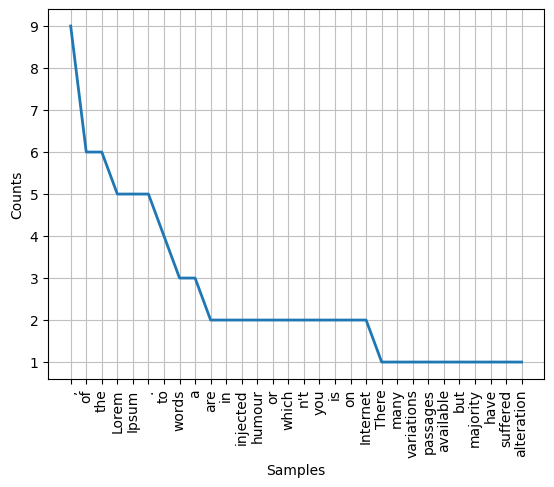

In [3]:
# 1. Word Tokenization with NLTK and Word Frequency Distribution
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nltk.download('punkt_tab')

text = """There are many variations of passages of Lorem Ipsum available, but the majority have suffered alteration in some form, by injected humour, or randomised words which don't look even slightly believable. If you are going to use a passage of Lorem Ipsum, you need to be sure there isn't anything embarrassing hidden in the middle of text. All the Lorem Ipsum generators on the Internet tend to repeat predefined chunks as necessary, making this the first true generator on the Internet. It uses a dictionary of over 200 Latin words, combined with a handful of model sentence structures, to generate Lorem Ipsum which looks reasonable. The generated Lorem Ipsum is therefore always free from repetition, injected humour, or non-characteristic words etc."""
tokens = word_tokenize(text)
fdist = FreqDist(tokens)
fdist.plot(30, cumulative=False)
plt.show()

In [4]:
# 2. Dependency Parsing with SpaCy
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
sentence = "SpaCy is great for dependency parsing."
doc = nlp(sentence)
displacy.render(doc, style="dep", jupyter=False)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="53a875f2e18347b598a2d4e24d530a50-0" class="displacy" width="1100" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">SpaCy</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">is</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">AUX</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">great</tspan>\n    <tspan class="displacy-t

In [5]:
# 3. Text Classification with TextBlob
from textblob import TextBlob

text = "TextBlob is an amazing library for NLP."
polarity = TextBlob(text).sentiment.polarity
classification = "positive" if polarity > 0 else "negative" if polarity < 0 else "neutral"
print(f"Polarity: {polarity}, Classification: {classification}")


Polarity: 0.6000000000000001, Classification: positive


In [6]:
# 4. Named Entity Recognition (NER) with SpaCy
text = "Barack Obama was the 44th President of the United States."
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Barack Obama PERSON
44th ORDINAL
the United States GPE


In [7]:
# 5. Calculating TF-IDF with Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

texts = ["This is a sample document.", "This document is another example."]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)
print(tfidf_matrix.toarray())
print(vectorizer.get_feature_names_out())

[[0.         0.44832087 0.         0.44832087 0.63009934 0.44832087]
 [0.53309782 0.37930349 0.53309782 0.37930349 0.         0.37930349]]
['another' 'document' 'example' 'is' 'sample' 'this']


In [8]:
# 6. Custom Text Classifier with NLTK's Naive Bayes
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

def format_sentence(sent):
    return {word: True for word in word_tokenize(sent)}

training_data = [
    (format_sentence("I love this movie!"), "positive"),
    (format_sentence("This movie is terrible."), "negative")
]

test_data = [
    (format_sentence("I enjoyed the plot."), "positive"),
    (format_sentence("The acting was bad."), "negative")
]

classifier = NaiveBayesClassifier.train(training_data)
print("Accuracy:", accuracy(classifier, test_data))


Accuracy: 1.0


In [9]:
# 7. Pre-trained Hugging Face Model for Text Classification
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("Hugging Face transformers are amazing!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998751878738403}]


In [10]:
# 8. Text Summarization with Hugging Face Transformers
summarizer = pipeline("summarization")
text = """
Hugging Face provides state-of-the-art NLP models. You can use them for tasks like text summarization,
question answering, and more.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[{'summary_text': ' Hugging Face provides state-of-the-art NLP models . You can use them for tasks like text summarization, question answering, and more .'}]


In [11]:
# 9. Simple RNN for Text Classification using Keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=1000, output_dim=32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# 10. Bidirectional LSTM for Text Classification
from keras.layers import Bidirectional, LSTM

model = Sequential([
    Embedding(input_dim=1000, output_dim=32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# 11. Implementing GRU for Text Classification
from keras.layers import GRU

model = Sequential([
    Embedding(input_dim=1000, output_dim=32),
    GRU(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# 12. Text Generation using LSTM in Keras
from keras.layers import LSTM

model = Sequential([
    Embedding(input_dim=1000, output_dim=32),
    LSTM(32, return_sequences=True),
    Dense(1000, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy')
print(model.summary())


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# 13. Bi-directional GRU for Sequence Labeling
model = Sequential([
    Embedding(input_dim=1000, output_dim=32),
    Bidirectional(GRU(32, return_sequences=True)),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
